In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_boston

In [6]:
boston = load_boston()

In [7]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [8]:
type(boston)

sklearn.datasets.base.Bunch

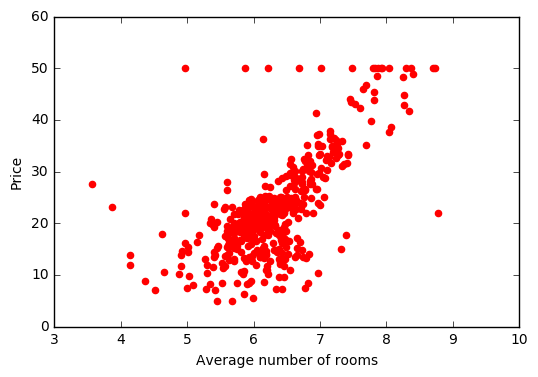

In [9]:
plt.scatter(boston.data[:,5],boston.target,color='r')
plt.xlabel('Average number of rooms')
plt.ylabel('Price')

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

In [13]:
lr.fit(boston.data[:,5].reshape(-1,1),boston.target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
grid = np.linspace(boston.data[:,5].min(),boston.data[:,5].max(),100)

In [15]:
best_line = lr.predict(grid.reshape(-1,1))

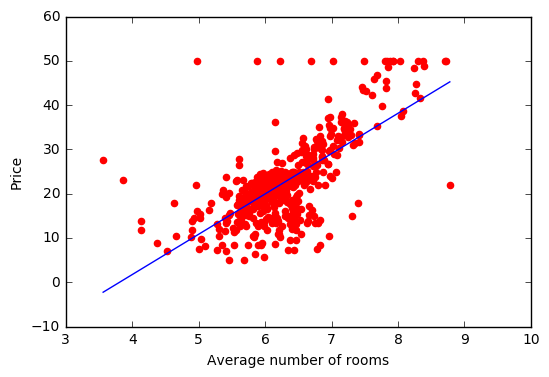

In [16]:
plt.scatter(boston.data[:,5],boston.target,color='r')
plt.plot(grid, best_line)
plt.xlabel('Average number of rooms')
plt.ylabel('Price')

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
y_pred = lr.predict(boston.data[:,5].reshape(-1,1))

In [19]:
MSE = mean_squared_error(boston.target,y_pred)

In [20]:
print("MSE =",MSE)

MSE = 43.6005517712


In [21]:
from sklearn.metrics import r2_score

In [22]:
r2 = r2_score(boston.target, y_pred)

In [23]:
r2


0.48352545599133423

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

In [26]:
scaler.fit(boston.data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [27]:
X = scaler.transform(boston.data)

In [28]:
print("new mean =",np.mean(X, axis=0))

new mean = [  6.34099712e-17  -6.34319123e-16  -2.68291099e-15   4.70199198e-16
   2.49032240e-15  -1.14523016e-14  -1.40785495e-15   9.21090169e-16
   5.44140929e-16  -8.86861950e-16  -9.20563581e-15   8.16310129e-15
  -3.37016317e-16]


In [29]:
print("new std =",np.std(X, axis=0))

new std = [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [30]:
y = boston.target

In [31]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_pred = lr.predict(X)

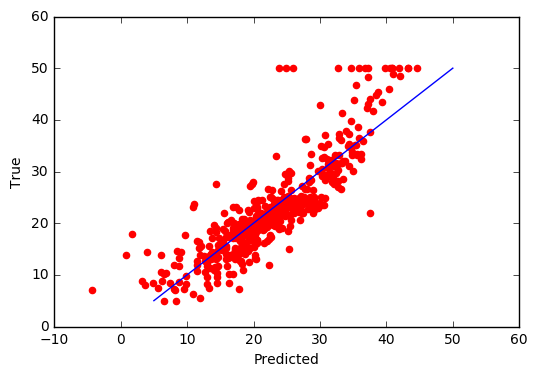

In [33]:
plt.scatter(y_pred,y, color='r')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.plot([y.min(), y.max()],[[y.min()],[y.max()]])

In [34]:
from sklearn.cross_validation import KFold

In [35]:
kf = KFold(X.shape[0],n_folds=5)